In [1]:
!pip install git+https://github.com/Shima-shoki/GcomcTool

  Cloning https://github.com/Shima-shoki/GcomcTool to c:\users\shoki\appdata\local\temp\pip-req-build-z69rli6h
  Created wheel for GcomcTool: filename=GcomcTool-2.0-py3-none-any.whl size=9296 sha256=f4487147ebf1a2adf5e51fb36d7fe21362b3393c27d392df3005d65552bcac4d
  Stored in directory: C:\Users\shoki\AppData\Local\Temp\pip-ephem-wheel-cache-t1qriu6f\wheels\d8\30\74\4eeb573ce9283cafa2a3c616ad2f55c6518cdf58e9518a99b1
Successfully built GcomcTool


  Running command git clone -q https://github.com/Shima-shoki/GcomcTool 'C:\Users\shoki\AppData\Local\Temp\pip-req-build-z69rli6h'


In [2]:
from GcomcTool.GcomcTool import GcomCpy

This program was tested under the GDAL 3.2.2.
Tile number vv:4 hh:26
Tile number vv:4 hh:27
Tile number vv:4 hh:28
Tile number vv:4 hh:29
Tile number vv:5 hh:27
Tile number vv:5 hh:28
Tile number vv:5 hh:29
Tile number vv:5 hh:30
The available L2 tile datasets can be found here: https://suzaku.eorc.jaxa.jp/GCOM_C/data/product_std.html


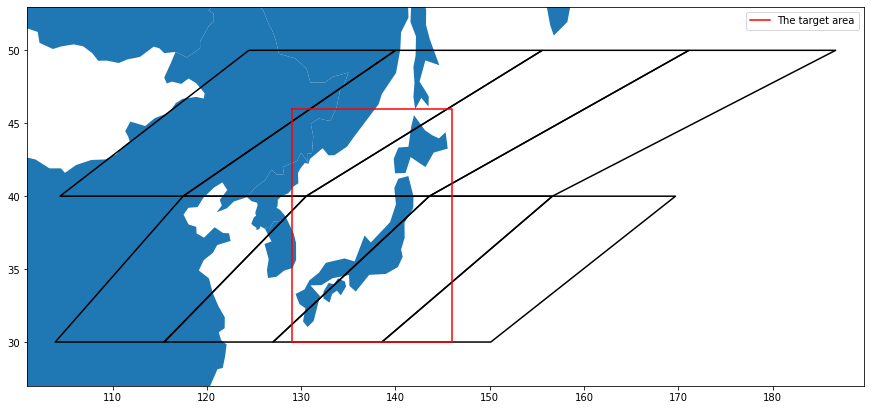

In [3]:
target=GcomCpy()
ROI=[129,30,146,46] #Set the Region of Interest (ROI) in a rectangular shape.
target.query_tiles(ROI,focus=True) #Apply the query function to find the tiles that contain the ROI.

#Those parallelograms show the approximate GCOM-C tiles.

In [4]:
#Filter the target product (in this example, above ground biomass or AGB products will be used.)in the ROI with the study period.
#It is required to give the username of the G-portal website to the program.
#By default, 8-day statistics data are selected. If we set statistics=False, the daily products are selected if they exist.
target.filter_products_tile('EVI_','2019-07-01','2019-07-10','SHIMADA',period='01M',statistics=True)
#The available filenames are shown.

Filtering process has started...
['/standard/GCOM-C/GCOM-C.SGLI/L2.LAND.EVI_.Statistics/2/2019/07/GC1SG1_20190701D01M_T0426_L2SG_EVI_Q_2000.h5']
['/standard/GCOM-C/GCOM-C.SGLI/L2.LAND.EVI_.Statistics/2/2019/07/GC1SG1_20190701D01M_T0427_L2SG_EVI_Q_2000.h5']
['/standard/GCOM-C/GCOM-C.SGLI/L2.LAND.EVI_.Statistics/2/2019/07/GC1SG1_20190701D01M_T0428_L2SG_EVI_Q_2000.h5']
['/standard/GCOM-C/GCOM-C.SGLI/L2.LAND.EVI_.Statistics/2/2019/07/GC1SG1_20190701D01M_T0429_L2SG_EVI_Q_2000.h5']
['/standard/GCOM-C/GCOM-C.SGLI/L2.LAND.EVI_.Statistics/2/2019/07/GC1SG1_20190701D01M_T0527_L2SG_EVI_Q_2000.h5']
['/standard/GCOM-C/GCOM-C.SGLI/L2.LAND.EVI_.Statistics/2/2019/07/GC1SG1_20190701D01M_T0528_L2SG_EVI_Q_2000.h5']
['/standard/GCOM-C/GCOM-C.SGLI/L2.LAND.EVI_.Statistics/2/2019/07/GC1SG1_20190701D01M_T0529_L2SG_EVI_Q_2000.h5']
['/standard/GCOM-C/GCOM-C.SGLI/L2.LAND.EVI_.Statistics/2/2019/07/GC1SG1_20190701D01M_T0530_L2SG_EVI_Q_2000.h5']


In [5]:
#Download the products that we selected in the previous step.
#You can give the path to the folder where the downloaded files will be stored.
target.get_products('C:/Users/shoki/Desktop/downloadTest')

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:42<00:00,  5.37s/it]


In [6]:
#Check the name of the sub-datasets.
target.show_subdatasets()

<KeysViewHDF5 ['EVI_AVE', 'EVI_Date', 'EVI_MAX', 'EVI_MIN', 'EVI_Ninput', 'EVI_Nused', 'EVI_QA_flag', 'EVI_RMS']>


In [7]:
#Apply the reprojection function on all the downloaded products.
#We need to specify the sub-dataset name.
#The second argument takes the name for the folder which will store the reprojected images.
#If clip=True, the images are clipped and merged to match the ROI. 
target.reproject_all('EVI_AVE','EVI_average_Japan',clip=True)

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [01:30<00:00, 11.37s/it]


This is the output image of the above processes.

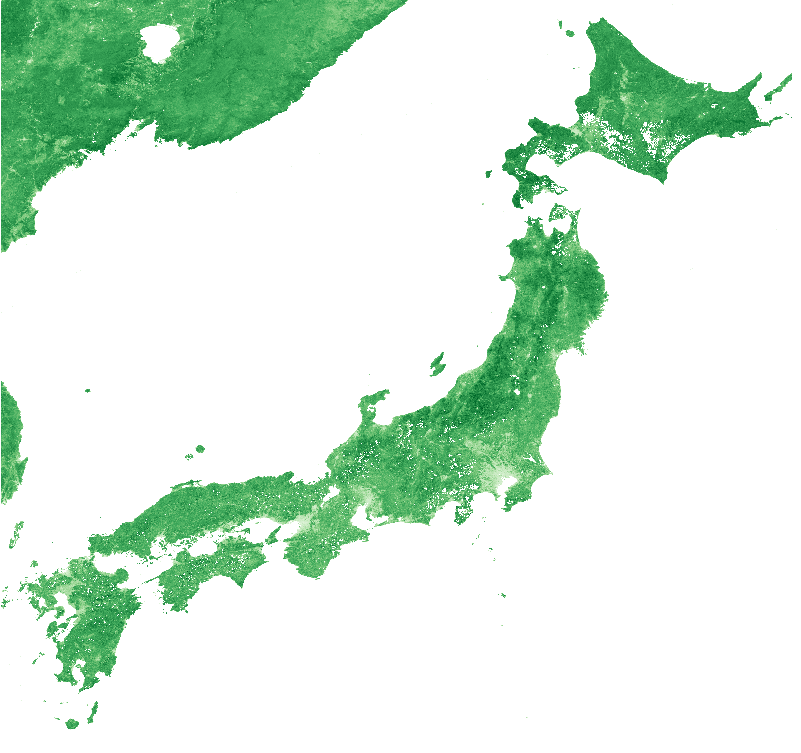

In [8]:
#The input hdf5 files can be removed after the reprojection and merging processes.
target.clean_up()